In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing data
diabetes_data=pd.read_csv("diabetes2.csv")

In [ ]:
# so we are splitting input and output
data_x=diabetes_data.drop('Outcome',axis=1)
data_y=diabetes_data.Outcome


In [ ]:
def accuracy(y,y_pred):
  return (np.sum(y_pred==y)/len(y))

In [ ]:
class Logistic_Regression:
  def __init__(self,learning_rate=0.05,epoch=1000):
    self.learning_rate=learning_rate
    self.epoch=epoch;
    self.weight=None
    self.bias=0
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  def fit(self,X,Y):
    sample_size,n_features=X.shape
    self.weight=np.random.rand(n_features)
    # now we are going to find gradient descent
    cost_list=[]
    correctness=[];
    for i in range(self.epoch):
      y_predicted=self.sigmoid(np.dot(X,self.weight)+self.bias)
      dw=(1/sample_size)*np.dot(X.T,(y_predicted-Y))
      db=(1/sample_size)*np.sum(y_predicted-Y)
      cost=-(1/sample_size)*np.sum(Y*np.log(y_predicted)+(1-Y)*np.log(1-y_predicted))
      cost_list.append(cost)
      y_predicted1=[]
      for i in y_predicted:
        if(i>0.5):
          y_predicted1.append(1)
        else:
          y_predicted1.append(0)
      correctness.append(accuracy(y_predicted1,Y))
      # if(i%10==0):
      #   print(cost)

      self.weight-=self.learning_rate*dw
      self.bias-=self.learning_rate*db
    print("correctness is:",correctness)
    print("cost is:",cost_list)
    return cost_list,correctness
  def predict(self,X):
    y_predicted=self.sigmoid(np.dot(X,self.weight)+self.bias)
    y_predicted1=[]
    for i in y_predicted:
      if(i>0.5):
        y_predicted1.append(1)
      else:
        y_predicted1.append(0)
    
    return y_predicted1









 

In [ ]:
# splitting train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data_x,data_y,test_size=0.2)
X_train=(X_train-np.mean(X_train))/np.std(X_train)
X_test=(X_test-np.mean(X_test))/np.std(X_test)
print(X_train)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)


     Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
436     2.379297  0.600231  ...                 -0.660849  0.682008
182    -0.852107 -3.771188  ...                 -0.498786 -1.040546
407    -1.145871 -0.617521  ...                 -0.389762 -0.696035
322    -1.145871  0.100640  ...                 -0.631383  0.251369
270     1.791769 -0.617521  ...                  1.967516  0.423625
..           ...       ...  ...                       ...       ...
713    -1.145871  0.412885  ...                 -0.342616 -1.040546
649    -1.145871 -0.430175  ...                 -0.987921 -0.868290
460     1.498005 -0.024257  ...                  0.780037  1.284901
759     0.616713  2.161452  ...                 -0.560664  2.835199
301    -0.558343  0.725129  ...                 -0.136354 -0.696035

[614 rows x 8 columns]


In [ ]:
learning_rate=0.01
epoch=1000
model=Logistic_Regression(learning_rate,epoch)
cost_list,correctness=model.fit(X_train,Y_train)
prediction=model.predict(X_test)
print(accuracy(Y_test,prediction));



correctness is: [0.6856677524429967, 0.6856677524429967, 0.6856677524429967, 0.6856677524429967, 0.6856677524429967, 0.6840390879478827, 0.6840390879478827, 0.6840390879478827, 0.6856677524429967, 0.6840390879478827, 0.6840390879478827, 0.6840390879478827, 0.6840390879478827, 0.6856677524429967, 0.6856677524429967, 0.6856677524429967, 0.6856677524429967, 0.6856677524429967, 0.6856677524429967, 0.6856677524429967, 0.6856677524429967, 0.6856677524429967, 0.6872964169381107, 0.6872964169381107, 0.6889250814332247, 0.6889250814332247, 0.6889250814332247, 0.6905537459283387, 0.6905537459283387, 0.6905537459283387, 0.6905537459283387, 0.6905537459283387, 0.6905537459283387, 0.6905537459283387, 0.6921824104234527, 0.6921824104234527, 0.6921824104234527, 0.6905537459283387, 0.6905537459283387, 0.6905537459283387, 0.6905537459283387, 0.6905537459283387, 0.6905537459283387, 0.6905537459283387, 0.6921824104234527, 0.6921824104234527, 0.6921824104234527, 0.6921824104234527, 0.6921824104234527, 0.6

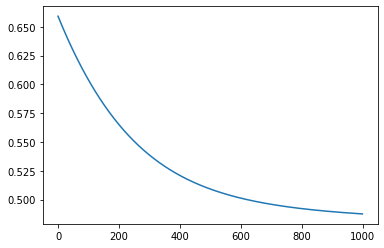

In [ ]:
plt.plot(np.arange(epoch),cost_list)

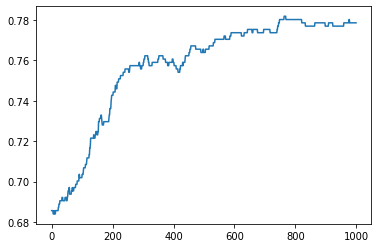

In [ ]:
plt.plot(np.arange(epoch),correctness)